# DANDI Tutorial

> Warning **This tutorial is still under construction.**


In [1]:
import pynwb
from pynwb import NWBHDF5IO, TimeSeries

from dandi.dandiapi import DandiAPIClient
import numpy as np
import fsspec
from fsspec.implementations.cached import CachingFileSystem

import pynwb
import h5py


In [2]:
# ecephys, Buzsaki Lab (15.2 GB)
dandiset_id, filepath = "000003", "sub-YutaMouse41/sub-YutaMouse41_ses-YutaMouse41-150831_behavior+ecephys.nwb"


In [3]:
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, "draft").get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

# first, create a virtual filesystem based on the http protocol
fs=fsspec.filesystem("http")

# create a cache to save downloaded data to disk (optional)
fs = CachingFileSystem(
    fs=fs,
    cache_storage="nwb-cache",  # Local folder for the cache
    )

# next, open the file
file = h5py.File(fs.open(s3_url, "rb"))
io = pynwb.NWBHDF5IO(file=file, load_namespaces=True)

/home/guillaume/miniconda3/envs/dandi/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/guillaume/miniconda3/envs/dandi/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [4]:
import pynapple as nap
import matplotlib.pyplot as plt

In [5]:
nwb = nap.NWBFile(io.read())

<class 'pynwb.file.NWBFile'>


In [6]:
nwb

                           YutaMouse41                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Keys                                             ┃ Type        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ units                                            │ TsGroup     │
│ trials                                           │ IntervalSet │
│ epochs                                           │ IntervalSet │
│ LFP                                              │ TsdFrame    │
│ states                                           │ IntervalSet │
│ EightMazePosition_twhl_norm_spatial_series       │ TsdFrame    │
│ EightMazePosition_twhl_linearized_spatial_series │ TsdFrame    │
│ PulseStim_5V_77877ms_LD12                        │ Ts          │
│ PulseStim_5V_77777ms_LD12                        │ Ts          │
│ PulseStim_5V_50ms_LD12                           │ Ts          │
│ PulseStim_5V_500ms_LD9999                        │ Ts          │
│ PulseStim_5V_200ms_LD2                           │ Ts          │
│ PulseStim_5V_200ms_LD1                           │ Ts          │
│ PulseStim_5V_2000ms_LD120                        │ Ts          │
│ PulseStim_5V_1ms_LD12                            │ Ts          │
│ PulseStim_5V_10ms_LD12                           │ Ts          │
│ PulseStim_5V_1000ms_LD1200                       │ Ts          │
│ PulseStim_5V_1000ms_LD12                         │ Ts          │
│ PulseStim_3V_200ms_LD2                           │ Ts          │
│ PulseStim_3V_200ms_LD1                           │ Ts          │
│ PulseStim_3.5V_200ms_LD2                         │ Ts          │
│ PulseStim_3.5V_200ms_LD1                         │ Ts          │
│ PulseStim_3.5V_10ms_LD12                         │ Ts          │
│ PulseStim_3.5V_1000ms_LD1200                     │ Ts          │
│ PulseStim_2.5V_200ms_LD2                         │ Ts          │
│ PulseStim_2.5V_200ms_LD1                         │ Ts          │
│ PulseStim_2.5V_10ms_LD12                         │ Ts          │
│ PulseStim_2.5V_1000ms_LD1200                     │ Ts          │
│ PulseStim_2.3V_200ms_LD2                         │ Ts          │
│ PulseStim_2.3V_200ms_LD1                         │ Ts          │
│ PulseStim_0V_13001ms_LD0                         │ Ts          │
│ PulseStim_0V_12001ms_LD0                         │ Ts          │
│ PulseStim_0V_11001ms_LD0                         │ Ts          │
│ PulseStim_0V_10201ms_LD0                         │ Ts          │
│ PulseStim_0V_10101ms_LD0                         │ Ts          │
│ PulseStim_0V_10031ms_LD0                         │ Ts          │
│ PulseStim_0V_10021ms_LD0                         │ Ts          │
│ PulseStim_0V_10011ms_LD0                         │ Ts          │
│ PulseStim_0V_10001ms_LD0                         │ Ts          │
│ DS2.ch31                                         │ Ts          │
│ DS1.ch31                                         │ Ts          │
│ position_sensor1                                 │ TsdFrame    │
│ position_sensor0                                 │ TsdFrame    │
│ ch_wait                                          │ Tsd         │
│ ch_solR                                          │ Tsd         │
│ ch_solL                                          │ Tsd         │
│ ch_entR                                          │ Tsd         │
│ ch_entL                                          │ Tsd         │
│ ch_dig2                                          │ Tsd         │
│ ch_dig1                                          │ Tsd         │
│ ch_arm                                           │ Tsd         │
│ ch_SsolR                                         │ Tsd         │
│ ch_SsolL                                         │ Tsd         │
└──────────────────────────────────────────────────┴─────────────┘

In [7]:
units = nwb['units']

print(units)

/home/guillaume/pynapple/pynapple/core/time_units.py:66: UserWarning: timestamps are not sorted
  warn("timestamps are not sorted", UserWarning)


  Index    rate  cell_type                                                      shank_id    global_id
-------  ------  -----------------------------------------------------------  ----------  -----------
      0    0.25  unknown                                                               0          891
      1    5.73  unknown                                                               1          892
      2    0.58  pyramidal cell                                                        2          893
      3    1.16  pyramidal cell                                                        3          894
      4    0.62  pyramidal cell                                                        4          895
      5   18.1   narrow waveform cell                                                  5          896
      6    5.22  wide waveform cell (wider)                                            6          897
      7    2.24  pyramidal cell                                                   

In [8]:
mossy = units.getby_category("cell_type")["mossy cell"]

print(mossy)

  Index    rate  cell_type      shank_id    global_id
-------  ------  -----------  ----------  -----------
     14    0.58  mossy cell            0          905
     19    1     mossy cell            5          910
     20    0.89  mossy cell            6          911
     21    0.71  mossy cell            7          912
     27    0.16  mossy cell            0          918
     34    1.07  mossy cell            7          925
     36    0.92  mossy cell            9          927
     38    1.04  mossy cell           11          929


In [9]:
cc = nap.compute_crosscorrelogram(mossy, 0.1, 2, norm=True)

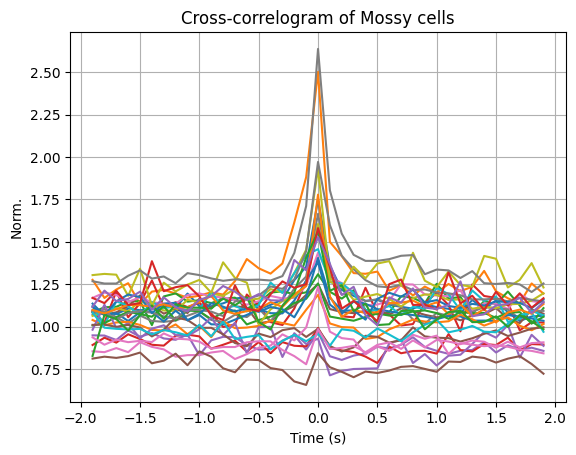

In [10]:
plt.figure()
plt.plot(cc)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Norm.")
plt.title("Cross-correlogram of Mossy cells")
plt.show()

In [11]:
stim_ts = nwb['PulseStim_5V_500ms_LD9999']

print(stim_ts)

Time (s)
33283.2784     
33285.2792     
33287.2792     
33289.2792     
33291.2792     
             ..
36873.5328     
36875.5328     
36877.5328     
36879.5328     
36881.5328     
Length: 1800, dtype: object


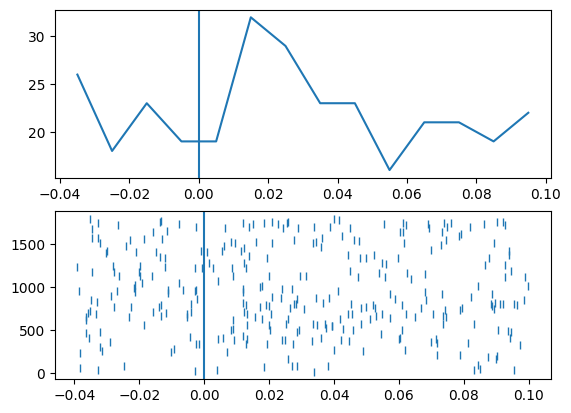

In [12]:
peth = nap.compute_perievent(mossy[19], stim_ts, (-0.04, 0.1))

plt.figure()
plt.subplot(211)
plt.plot(peth.count(0.01).as_dataframe().sum(1))
plt.axvline(0)
plt.subplot(212)
plt.plot(peth.to_tsd(), '|')
plt.axvline(0)
plt.show()

In [13]:
mossy_cell = units.getby_category("cell_type")["mossy cell"]
granule_cell = units.getby_category("cell_type")["granule cell"]

cc_mossy = nap.compute_eventcorrelogram(mossy_cell, stim_ts, 0.01, 0.4, norm=True)
cc_granule = nap.compute_eventcorrelogram(granule_cell, stim_ts, 0.01, 0.4, norm=True)

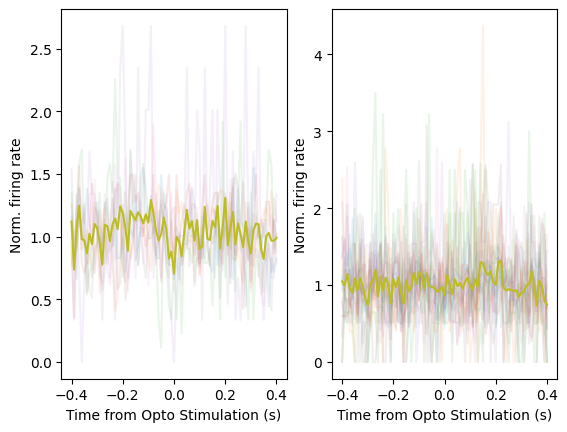

In [14]:
plt.figure()
plt.subplot(121)
plt.plot(cc_mossy, alpha = 0.1)
plt.plot(cc_mossy.mean(1))
plt.xlabel("Time from Opto Stimulation (s)")
plt.ylabel("Norm. firing rate")
plt.subplot(122)
plt.plot(cc_granule, alpha = 0.1)
plt.plot(cc_granule.mean(1))
plt.xlabel("Time from Opto Stimulation (s)")
plt.ylabel("Norm. firing rate")
plt.show()